# Dipole Example

Simple dipole example


In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [18]:
# locate the drift template
from impact import Impact

ifile = '../templates/dipole/ImpactT.in'
os.path.exists(ifile)

True

In [26]:
I = Impact(ifile)
I.header['Bcurr'] = 0
#I.total_charge=1e-12
#I.stop = 2.5
I.run()

c_light = 299792458. # m/s
I.particles['final_particles']['mean_t'] * c_light, I.particles['final_particles']['mean_z']

(2.6999993236360877, 2.700000061274841)

In [27]:
I.stat('mean_z')

array([1.2288994e-06, 1.4990850e-02, 2.9980471e-02, 4.4970092e-02,
       5.9959713e-02, 7.4949334e-02, 8.9938955e-02, 1.0492858e-01,
       1.1991820e-01, 1.3490782e-01, 1.4989744e-01, 1.6488706e-01,
       1.7987668e-01, 1.9486630e-01, 2.0985592e-01, 2.2484554e-01,
       2.3983516e-01, 2.5482478e-01, 2.6981441e-01, 2.8480403e-01,
       2.9979365e-01, 3.1478327e-01, 3.2977289e-01, 3.4476251e-01,
       3.5975213e-01, 3.7474175e-01, 3.8973137e-01, 4.0472099e-01,
       4.1971062e-01, 4.3470024e-01, 4.4968986e-01, 4.6467948e-01,
       4.7966910e-01, 4.9465872e-01])

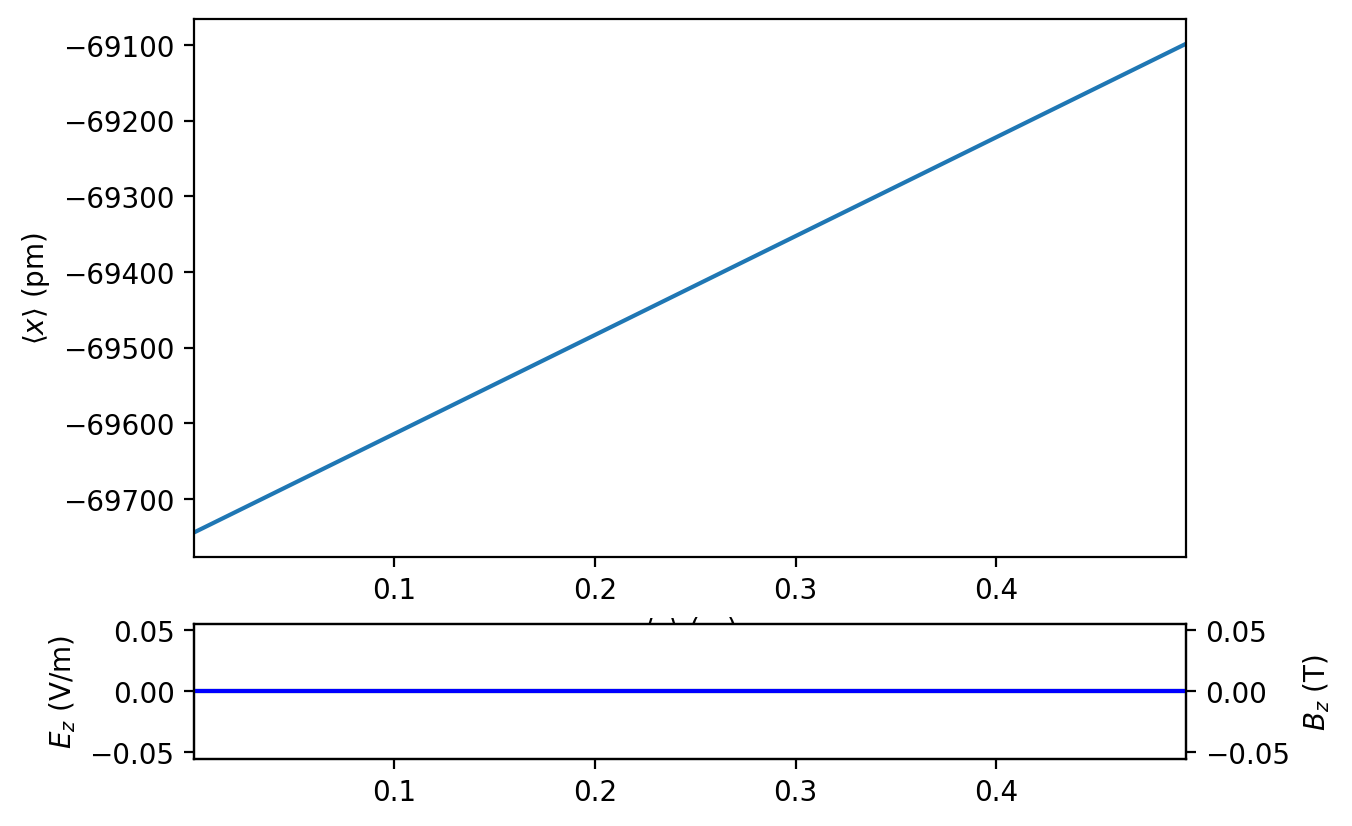

In [28]:
I.plot('mean_x')

In [22]:
!cat {I.path}/ImpactT.in

! Impact-T input file
!Npcol Nprow
1 1
!Dt Ntstep Nbunch
1e-11 10000000 1
!Dim Np Flagmap Flagerr Flagdiag Flagimg Zimage
6 10000 1 0 2 0 0.02
!Nx Ny Nz Flagbc Xrad Yrad Perdlen
32 32 32 1 0.015 0.015 45.0
!Flagdist Rstartflg Flagsbstp Nemission Temission
2 0 0 0 0.0
!sigx(m) sigpx muxpx xscale pxscale xmu1(m) xmu2
1e-05 0.0005 0.0 1.0 1.0 0.0 0.0
!sigy(m) sigpy muxpy yscale pyscale ymu1(m) ymu2
1e-05 0.0 0.0 1.0 1.0 0.0 0.0
!sigz(m) sigpz muxpz zscale pzscale zmu1(m) zmu2
0.0003 0.0 0.0 1.0 1.0 0.0 1956.9511835591836
!Bcurr Bkenergy Bmass Bcharge Bfreq Tini
0 1.0 510998.95 -1.0 1000000000.0 0.0
!=================== LATTICE ===================
0 0 0 -8 0.0 -1 -1000.0 /!name:SC_off
!0.2 0 0 1 0.5 2.98 0.108 0.016 0.0 0.0 0.0 0.0 0.0 /!name:QE04
2.2 0 0 4 0.5 0.0 -0.33356405164803316 777 0.01 /!name:B1
!0 1 42 -2 0.0 0.0 3.0 /!name:beam1
!0 1 43 -2 0.0 0.0 3.1 /!name:beam2
0 0 0 -99 2.5 0.0 2.5 /!name:stop_1


In [23]:
# calculate gamma*beta
mec2 = 0.51099895000e6 # eV
Etot = 1e9 #eV
gamma = Etot/mec2
GB = np.sqrt(gamma**2 -1)
GB


1956.9509280596917

In [24]:
from impact.elements.dipole import new_dipole_fieldmap_data, dipole_fieldmap_lines
#THETA = 30*np.pi/180
MYL = 2.1
#MYG = THETA/MYL
GAMMA=1e9/mec2
MYG = 1/10
#GAMMA = 1e9/mec2
THETA = MYG*MYL


GB = np.sqrt(GAMMA**2 -1)

DMAP = new_dipole_fieldmap_data(L=MYL, g=MYG, gamma_ref=GAMMA, e1=0, e2=0,  half_gap=0.01, fint=0.5, csr_on=True)

# make fieldmap
print(dipole_fieldmap_lines(DMAP, '../templates/dipole/rfdata777'))

1
1956.9511835591834
0.0
0.0
0.0
0.03
0.2131424443826454
2.131087505316458
0.2131424443826454
2.1617613823364508
0.03
0.03
0
2.0
0
0
0
0
0
0
0.015
2.145


In [25]:
DMAP

{'csr_on': 1,
 'gamma_ref': 1956.9511835591834,
 'entrance_s': 0.015,
 'exit_s': 2.145,
 'k1': 0.0,
 'k2': 0.0,
 'b1': 0.0,
 'b2': 0.03,
 'k3': 0.2131424443826454,
 'k4': 0.2131424443826454,
 'b3': 2.131087505316458,
 'b4': 2.1617613823364508,
 'c1': 0,
 'c2': 2.0,
 'c3': 0,
 'c4': 0,
 'c5': 0,
 'c6': 0,
 'c7': 0,
 'c8': 0,
 'w1': 0.03,
 'w2': 0.03}

# Use Impact's built-in Gaussian particle generator

In [ ]:
I = Impact(ifile)

c_light=299792458.

I.header['Np'] = 1000000
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 256
I.header['Dt'] = 0.01/c_light
#I.header['Ntstep'] = 200
#I.input['fieldmaps']['rfdata777']['data'][0] = 1 # Turn on/off CSR
#I.input['fieldmaps']['rfdata777']['data'][-1] = 1 # exit_s
I.ele['B1']['L'] = MYL

#I.header['zmu2'] = GB
I.stop = 3.1
I.total_charge = 1e-12
I.verbose=True
I.write_input()
print(I)


In [ ]:
!cat {I.path}/ImpactT.in

In [ ]:
%%time
I.run()

In [ ]:
afile1 = I.archive()

In [ ]:
PF = I.particles['final_particles']
PF['mean_z']

In [ ]:
P26 = PF.copy()

In [ ]:
PF.plot('delta_z', 'delta_p', bins=100, figsize=(12,8))

In [ ]:
P2 = PF.copy()

In [ ]:
P1['mean_z'], P2['mean_z']

In [ ]:
k1 = 'min_p'
P1[k1], P4[k1], P3[k1]

In [ ]:
k1='delta_z'
k2='p'
plt.scatter(P1[k1], P1[k2])
plt.scatter(P2[k1], P2[k2])

In [ ]:
I.particles['initial_particles'].plot('y', 'py')

# Single particle tracking

In [ ]:
from impact.elements import dipole

In [ ]:
dipole.parse_dipole_fieldmap_data

In [ ]:
I.ele['B1']

In [ ]:
DATA = I.input['fieldmaps'][I.ele['B1']['filename']]['data']
DMAP = dipole.parse_dipole_fieldmap_data(DATA)
DMAP

In [ ]:
I.track1(pz0=1e9)
I.path

In [ ]:
I.header['Flagdist']

In [ ]:
dipole.plot_dipole_fieldmap(DMAP, ref_data=I.output['dipole_stats'], g=1/10, L=3.0)

In [ ]:
I.input['fieldmaps']['rfdata777']['data'][0] = 1

In [ ]:
I.run()

# CSR analysis

In [ ]:
%%time
I1 = I.copy()
I1.configure()
I1.stop = 2.5
I1.verbose=True
I1.run()

I1.particles['final_particles']['mean_t']*c_light

In [ ]:
!cat {I1.path}/ImpactT.in

In [ ]:
I2 = I.copy()
I2.configure()
I2.stop = 2.6
I2.verbose=False
I2.run()

In [ ]:
, I2.particles['final_particles']['mean_t']*c_light

In [ ]:
from scipy.constants import physical_constants

mec2 = physical_constants['electron mass energy equivalent in MeV'][0]*1e6

c_light = 299792458. # m/s

r_electron = physical_constants['classical electron radius'][0]

def W0_calc(rho=10, sigma_z=0.0003, total_charge=1e-12):
    
    N = total_charge/1.6e-19
    
    return N*r_electron*mec2 / rho**(2/3.) / sigma_z**(4/3.)
    
W0 = W0_calc()  

W0

In [ ]:
#I1 = Impact.from_archive('impact_6bcb411d0efbbf51d6df8096bdc4dd0d.h5') # 2.5 m

#I2 = Impact.from_archive('impact_8abe9fea7069035129b86b72021a3957.h5') # 2.6 m

P1 = I1.particles['final_particles']
z1 = P1['mean_z']
P1.z -= z1

P2 = I2.particles['final_particles']
z2 = P2['mean_z']
P2.z -= z2

z1, z2

In [ ]:
from pmd_beamphysics.statistics import slice_statistics
?slice_statistics

In [ ]:
dat1 = slice_statistics(P1, keys=['mean_z', 'mean_energy'])
dat2 = slice_statistics(P2, keys=['mean_z', 'mean_energy'])

In [ ]:
plt.plot(dat1['mean_z'], dat1['mean_energy'])

In [ ]:
Z = np.linspace(-6e-4, 6e-4, 100)
E1 = np.interp(Z, dat1['mean_z'], dat1['mean_energy'])
E2 = np.interp(Z, dat2['mean_z'], dat2['mean_energy'])

In [ ]:

dz = z2-z1
dz

In [ ]:
plt.plot(Z, E1)
plt.plot(Z, E2)

In [ ]:
plt.xlabel('$z/\sigma_z$')
plt.ylabel('$dE/dz/W_0$')
plt.plot(Z/0.0003, (E2-E1)/dz/W0)

In [ ]:
# Mathematica computed
SSdat = np.loadtxt('../../devel/steadystate_csr_wake.dat').T
SSz = SSdat[0]
SSw = SSdat[1]
plt.plot(SSz, SSw)

In [ ]:
plt.xlabel('$z/\sigma_z$')
plt.ylabel('$dE/dz/W_0$')
plt.scatter(Z/0.0003, (E2-E1)/dz/W0, label='Impact-T', color='red')
plt.plot(SSz, SSw, label='1-D model', color='black')
plt.legend()

In [ ]:
0.02**(2/3)*2.5

In [ ]:
(0.0006)**(-2/3)*(100.0)**(-1/3) * 0.0254/2

In [ ]:
W0_calc(rho=10, sigma_z=0.05, total_charge=1e-9) / 2.5e6